In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [7]:
data = pd.read_csv("student-mat.csv", sep=";")
data = data[["G1","G2", "G3", "studytime", "failures","absences"]]
print(data.head())


   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [10]:
predict = "G3"

X = np.array(data.drop([predict], 1))

y = np.array(data[predict])


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [18]:
from sklearn.linear_model import LinearRegression
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.8204055340988972


In [23]:
print('Coefficent: \n', + linear.coef_)
print('Intercept: \n',  + linear.intercept_)

Coefficent: 
 [ 0.15856676  0.96072033 -0.16452346 -0.31553175  0.0336938 ]
Intercept: 
 -1.3267175653485754


In [26]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

12.429752139889128 [14 12  2  0 10] 11
16.201300334205172 [14 16  1  0  3] 16
15.20092949691186 [15 15  2  0  2] 16
14.974975138148364 [14 15  2  0  0] 15
14.442371965398724 [15 14  2  0  8] 14
13.487608333621033 [14 13  1  0  8] 13
12.894967711708809 [13 13  2  0  0] 12
14.313553466064128 [14 14  1  0  4] 14
6.539974719512947 [8 7 2 0 6] 9
3.948229441630583 [6 5 1 1 0] 0
9.695673193132706 [11 10  2  0  0] 10
8.247339180278452 [10  9  4  0  0] 0
7.646974264656057 [ 9  8  2  1 15] 8
7.477180792153197 [8 9 1 3 0] 10
12.763763909872138 [11 13  1  1 10] 13
13.825939787512885 [13 14  3  0  4] 14
4.8134156809935185 [8 6 2 2 2] 5
9.263568964588444 [ 7 10  2  0  6] 10
13.905240793493482 [11 14  1  0  6] 14
14.307596763538807 [15 14  2  0  4] 14
13.158561412903325 [14 13  3  0  8] 14
11.305937048596979 [ 8 12  1  0  0] 12
14.246165865134168 [14 14  1  0  2] 14
3.632697690452334 [6 5 1 2 0] 0
18.077133797295573 [16 18  3  0  2] 18
12.787555465845754 [12 13  1  1  6] 14
8.484215090832567 [ 7 10  

In [28]:
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [29]:
with open("Studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [30]:
pickle_in = open("Studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [31]:
'''
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)
    if acc > best:
        best = acc
        with open("Studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
'''

0.8133269522279989
0.8330075346400134
0.8992604723497715
0.8127861030156259
0.7482599451000453
0.9382653862401448
0.8223943227232002
0.9018889319881054
0.8218237895880462
0.82854845174214
0.7976985965014249
0.8041959894123749
0.703352192942135
0.8282493576217959
0.8277772682840934
0.868280804704693
0.7255071444641932
0.9075742990364097
0.6403778243914249
0.8976330896857121
0.6740839769326286
0.9128710835990572
0.8320030644113015
0.6790758745460266
0.838356333623696
0.8084925067394113
0.8620371076188342
0.7524059494961012
0.7606917117873503
0.7515869904621014


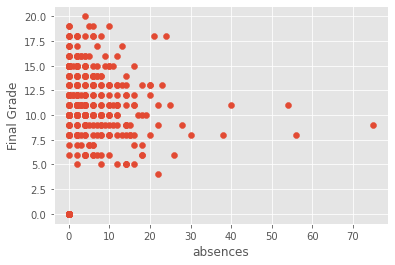

In [37]:
style.use("ggplot")
p = 'absences'
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [51]:
df = pd.read_csv("car (1).data")
print(df.head())

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


In [54]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(df["buying"]))
maint = le.fit_transform(list(df["maint"]))
door = le.fit_transform(list(df["door"]))
person = le.fit_transform(list(df["persons"]))
lug_buut = le.fit_transform(list(df["lug_boot"]))
safe = le.fit_transform(list(df["safety"]))
clas = le.fit_transform(list(df["class"]))
print(buying)
                      
                    



[3 3 3 ... 1 1 1]


In [58]:
predict = "class"

X2 = list(zip(buying, maint, door, person, lug_buut, safe))
y2 = list(clas)

In [62]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1)
#print(X2_train, y2_test)

In [69]:
model = KNeighborsClassifier(n_neighbors=9)



model.fit(X2_train, y2_train)
acc = model.score(X2_test, y2_test)
print(acc)

predicted  = model.predict(X2_test)

0.9710982658959537


In [73]:
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted:  ", names[predicted[x]], "Data: ", X2_test[x], "Actual: ", names[y2_test[x]])
    n = model.kneighbors([X2_test[x]], 9, True)
    print("N: ", n)

Predicted:   good Data:  (2, 1, 2, 2, 2, 1) Actual:  good
N:  (array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[ 275,  200,  777,  287,  207,  525,  114,  503, 1066]]))
Predicted:   good Data:  (0, 2, 0, 1, 0, 1) Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.41421356, 1.41421356]]), array([[ 480, 1136,  638,  706,  426, 1388, 1434,  178,  284]]))
Predicted:   good Data:  (0, 2, 3, 0, 2, 2) Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[ 308,  320, 1377, 1139, 1507, 1486,  825,  700,  300]]))
Predicted:   unacc Data:  (2, 3, 2, 1, 1, 2) Actual:  unacc
N:  (array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[1327, 1075,  518, 1096,  698, 1335, 1158,  549,  260]]))
Predicted:   good Data:  (0, 1, 1, 2, 0, 1) Actual:  good
N:  (array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[ 504,  884, 1284,  5